# **Thuật toán PCA**

Tổ chức thành function với đầu vào là

1.   data: dữ liệu muốn giảm chiều
2.   k: số chiều muốn giảm (kiểm tra đảm bảo nhỏ hơn số chiều data)

Note: PCA không áp dụng cho feature có giá trị rời rạc

**Làm không sử dụng AI tool trước nhé!**

In [16]:
# Sử dụng các thư viện sau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import pandas as pd

In [2]:
!wget https://archive.org/download/dimensionaity_reduction/dimensionaity_reduction.csv

--2024-04-08 15:42:19--  https://archive.org/download/dimensionaity_reduction/dimensionaity_reduction.csv
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801206.us.archive.org/8/items/dimensionaity_reduction/dimensionaity_reduction.csv [following]
--2024-04-08 15:42:19--  https://ia801206.us.archive.org/8/items/dimensionaity_reduction/dimensionaity_reduction.csv
Resolving ia801206.us.archive.org (ia801206.us.archive.org)... 207.241.228.26
Connecting to ia801206.us.archive.org (ia801206.us.archive.org)|207.241.228.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649 [text/csv]
Saving to: ‘dimensionaity_reduction.csv’

dimensionaity_reduc 100%[===================>]     649  --.-KB/s    in 0s      

2024-04-08 15:42:20 (121 MB/s) - ‘dimensionaity_reduction.csv’ saved [649/649]



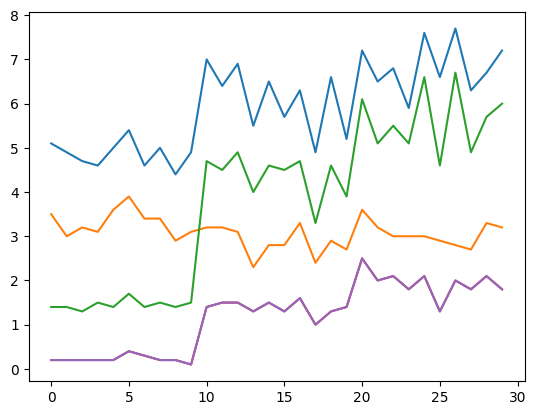

In [3]:
# visualize data ban đầu
df = pd.read_csv('dimensionaity_reduction.csv')
plt.plot(df)
plt.show()

In [48]:
def my_PCA(data, k):
  '''Thực hiện từng bước trong PCA produre'''
  # tính mean từng feature
  mean = data.mean(axis=0)
  # Thực hiện chuẩn hóa bằng cách data - mean
  data_norm = data - mean
  # Tính ma trận hiệp phương sai
  covn = np.cov(data_norm, rowvar=False)
  # Tính các giá trị riêng và vector riêng
  evg_values, evg_vectors = np.linalg.eig(covn)
  # Sắp xếp các giá trị riêng và vector riêng theo thứ tự giảm dần của vector riêng
  idx = np.argsort(-evg_values)
  evg_values = evg_values[idx]
  evg_vectors = evg_vectors[: ,idx]
  # Giữ lại k thành phần chính (k là số chiều mới)
  norm_chinh = evg_vectors[:, :k]
  # Chiếu dữ liệu ban đầu vào không gian mới
  data_new = np.dot(data_norm, norm_chinh)
  return data_new

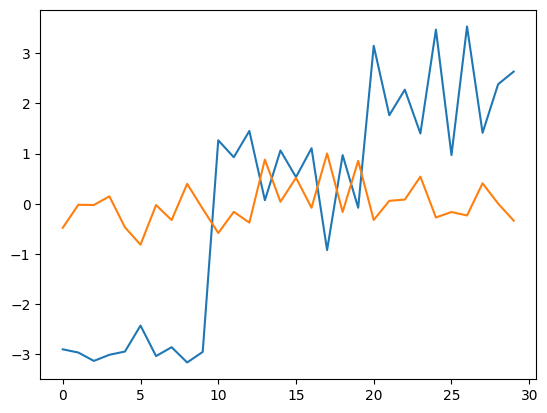

In [45]:
data_new = my_PCA(df, 2)
plt.plot(data_new)
plt.show()

Một chút note cho buổi thảo luận cực kỳ sôi nổi và bế tắc hôm ấy!
- Giá trị của data giảm chiều = Z (trong tài liệu machine learning cơ bản)
- Trong sklearn, pca.components_ = vector riêng chính (norm chính trong phần code thủ công PCA)
- Ma trận hiệp phương sai chuyền data ban đầu hay data_norm cũng không thay đổi giá trị


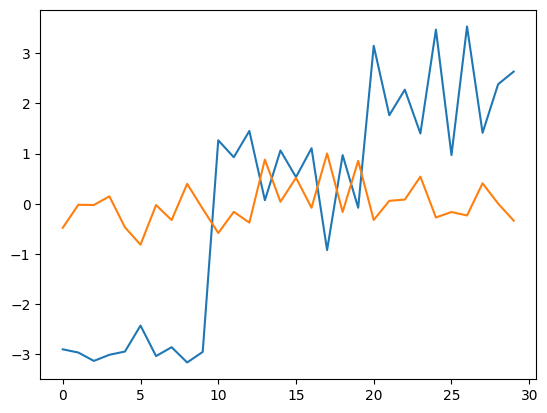

In [8]:
from sklearn.decomposition import PCA

pca = PCA(2)
data_new = pca.fit_transform(df)
plt.plot(data_new)
plt.show()

# **PCA với Table Data**


Dự đoán giá nhà

In [9]:
!wget https://raw.githubusercontent.com/Vinayak409/Real-estate-price-prediction/master/Real%20estate.csv

--2024-04-08 15:52:23--  https://raw.githubusercontent.com/Vinayak409/Real-estate-price-prediction/master/Real%20estate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21553 (21K) [text/plain]
Saving to: ‘Real estate.csv’

Real estate.csv     100%[===================>]  21.05K  --.-KB/s    in 0.001s  

2024-04-08 15:52:23 (14.9 MB/s) - ‘Real estate.csv’ saved [21553/21553]



In [27]:
data_1 = pd.read_csv('Real estate.csv')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [37]:
data_1 = data_1.drop(columns=['No', 'X1 transaction date'])
data = np.array(data_1)
data.shape

(414, 6)

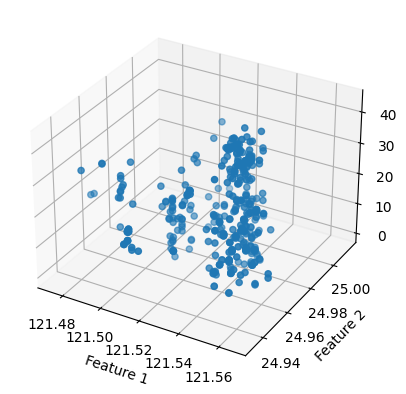

In [43]:
# visualize data ban đầu 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 4], data[:, 3], data[:, 0])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

In [57]:
# sử dụng thuật toán PCA ở trên để giảm chiều dữ liệu
feature = my_PCA(data[:, :-1], 2)
feature.shape
feature[:5]

array([[999.01085461, -14.59532934],
       [777.29668474,  -2.03389494],
       [521.90295346,   4.28816412],
       [521.90295346,   4.28816412],
       [693.32079908,  12.55147636]])

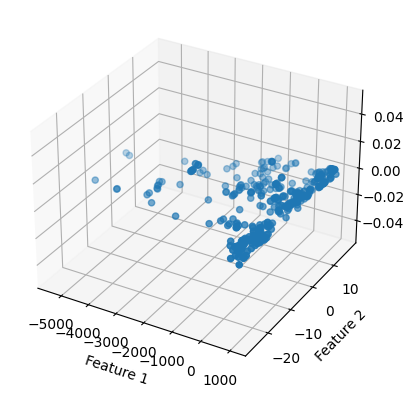

In [66]:
# visualize data sau khi giảm chiều
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.zeros(feature.shape[0])
ax.scatter(feature[:, 0], feature[:, 1], x)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

# **PCA với model Machine Learning**



Yêu cầu:
- Tính nghiệm của data ban đầu bằng Linear Regression
- Tính nghiệm của data sau khi giảm chiều bằng Linear Regression
- Tính thời gian thực hiện và cost mỗi data

Note: time.time() để lấy thời gian hiện tại

In [69]:
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [70]:
# data ban đầu
idx = np.random.rand(len(data)) < 0.8
train = data[idx]
test =  data[~idx]
train_x, train_y = train[:, 2:-1], train[:, -1]
test_x, test_y = test[:, 2:-1], test[:, -1]

regr = LinearRegression()
start_time = time.time()
regr.fit(train_x, train_y)
end_time = time.time()
run_time = end_time - start_time

predict_y = regr.predict(test_x)
print('run time: ', run_time)
print("MSE:", mean_squared_error(test_y, predict_y))

run time:  0.017282962799072266
MSE: 148.90987403950314


In [73]:
# data sau
train_x, train_y = feature[idx], data[idx, -1]
test_x, test_y =  feature[~idx], data[~idx, -1]

regr = LinearRegression()
start_time = time.time()
regr.fit(train_x, train_y)
end_time = time.time()
run_time = end_time - start_time

predict_y = regr.predict(test_x)
print('run time: ', run_time)
print("MSE:", mean_squared_error(test_y, predict_y))

run time:  0.007410287857055664
MSE: 128.62800502886455
